# Exploration of Dandiset 001366

**Title:** Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

**Description:** Movies of a pial vessel of mice used in the experiments.

**Keywords:** full width at half maximum, vessel pulsation, image analysis, vessel diameter, radon transform

**License:** CC-BY-4.0

**Citation:** Ranjan et al. (2025), https://dandiarchive.org/dandiset/001366/draft

---

**Note:** This notebook was *automatically generated* with `dandi-notebook-gen`. It has not been fully reviewed for correctness. Please interpret both code and analyses with caution.

---

## List Dandiset assets
Using the DANDI API to explore all files in this Dandiset.

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001366")
assets = list(dandiset.get_assets())
print(f"Number of assets: {len(assets)}")
for asset in assets:
    print(asset.path)

Number of assets: 2
sub-F15/sub-F15_ses-F15BC-19102023_image.nwb
sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb


---
## Load the NWB file
We demonstrate loading a specific NWB file: **sub-F15/sub-F15_ses-F15BC-19102023_image.nwb**

The data are accessed via a Lindi streaming URL.

In [2]:
import pynwb
import lindi

lindi_url = "https://lindi.neurosift.org/dandi/dandisets/001366/assets/71fa07fc-4309-4013-8edd-13213a86a67d/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(lindi_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Dataset metadata

In [3]:
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experiment description: {nwb.experiment_description}")
print(f"Experimenter(s): {nwb.experimenter}")
print(f"Institution: {nwb.institution}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject species: {nwb.subject.species}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject age: {nwb.subject.age}")

Session description: a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Identifier: 202309_Hashmat-OCT.2023-F15BC-19102023
Session start time: 2023-10-19 02:00:00-04:00
Experiment description: Vessel diameter and pulsatility measurement.
Experimenter(s): ('Ghanizada, Hashmat ',)
Institution: University of Copenhagen
Subject ID: F15
Subject species: Mus musculus
Subject sex: F
Subject age: P9W/P16W


## Access imaging movie data

The NWB file contains imaging movies of cerebral vessels. Here we extract a small subset of frames for visualization.
We only download the first 100 frames to keep this manageable.

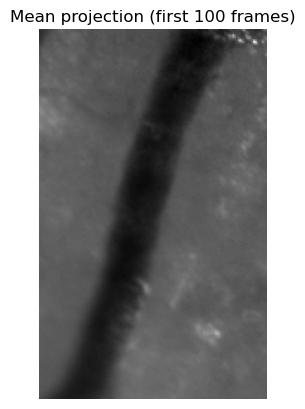

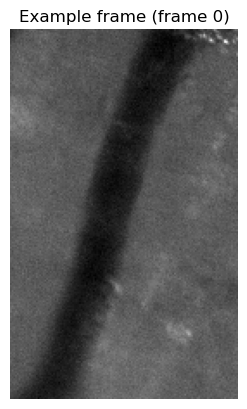

In [4]:
import numpy as np
import matplotlib.pyplot as plt

movies = nwb.acquisition['Movies']
data = movies.data

num_frames_to_load = min(100, data.shape[0])
subset = data[:num_frames_to_load]

mean_img = np.mean(subset, axis=0)
single_frame = subset[0]

plt.figure()
plt.imshow(mean_img, cmap='gray')
plt.title('Mean projection (first 100 frames)')
plt.axis('off')
plt.savefig('tmp_scripts/movie_mean_projection.png', bbox_inches='tight')
plt.show()

plt.figure()
plt.imshow(single_frame, cmap='gray')
plt.title('Example frame (frame 0)')
plt.axis('off')
plt.savefig('tmp_scripts/movie_example_frame.png', bbox_inches='tight')
plt.show()

### Mean Projection of First 100 Frames
The mean projection provides an overview of the vessel structure, aiding in vessel identification and quality check.

![](tmp_scripts/movie_mean_projection.png)

### Example Single Frame
A raw, individual frame showing typical image contrast and vessel morphology.

![](tmp_scripts/movie_example_frame.png)

## Example analyses 

Below are examples of analyses that could be relevant for this dataset:

- Vessel diameter estimation across frames
- Vessel pulsatility quantification via diameter variation
- Motion correction or filtering (not detailed here)

**The following example estimates mean vessel intensity across the subset frames as a placeholder.**
This is for demonstration purposes and **not a full analysis**.

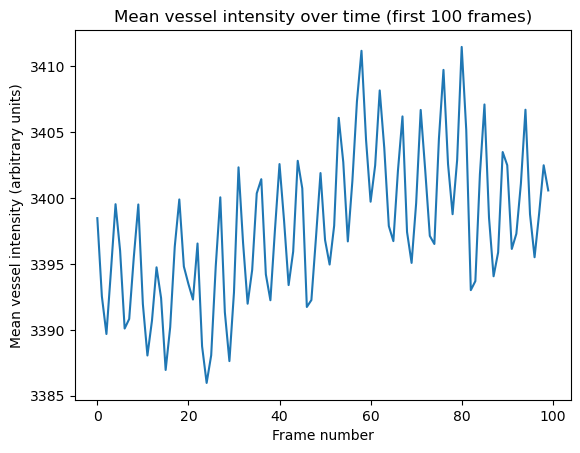

In [5]:
vessel_signal = np.mean(subset, axis=(1,2))  # mean intensity per frame

plt.figure()
plt.plot(vessel_signal)
plt.xlabel('Frame number')
plt.ylabel('Mean vessel intensity (arbitrary units)')
plt.title('Mean vessel intensity over time (first 100 frames)')
plt.show()

This simple plot shows changes in overall intensity, which could arise from motion, focus, or true physiological fluctuations. Users should apply more sophisticated techniques for quantitative analysis.

*End of notebook.*